# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Procesamiento digital de imágenes

### Trabajo práctico entregable (media materia)

**Estudiante:**
- [Chevallier-Boutell, Ignacio José.](https://www.linkedin.com/in/nachocheva/)

**Docentes:**
- Delrieux, Claudio (LCI, UNS-CONICET).
- Bajo, Juan Miguel (ICIC, UNS-CONICET).

---

## Librerías

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

## Imágenes a usar

Se utilizarán las siguientes imágenes, extraídas de la documentación de imageio:
* La astronauta se usará en el ejercicio 1.
* El caballo se usará en el ejercicio 2.

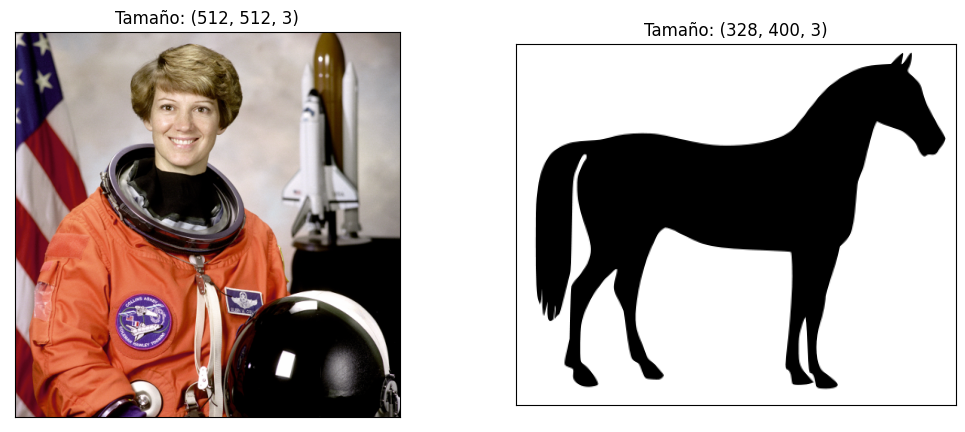

In [2]:
astro = iio.imread('imageio:astronaut.png')
horse = iio.imread('imageio:horse.png')
horse = horse[:, :, :3]

fig, axs = plt.subplots(1, 2, figsize=(12.5, 5))
axs[0].imshow(astro)
axs[0].set_title(f'Tamaño: {astro.shape}')

axs[1].imshow(horse)
axs[1].set_title(f'Tamaño: {horse.shape}')


for c in range(2):
    axs[c].set_xticks([])
    axs[c].set_yticks([])

plt.show()

---
# Ejercicio 1

## Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

### Funciones necesarias

#### Cambio de base

In [3]:
# Matriz de cambio de base: de RGB a YIQ 
RGB2YIQ = np.array([[0.299,     0.587,     0.114],
                    [0.595716, -0.274453, -0.321263],
                    [0.211456, -0.522591,  0.311135]])

# Matriz de cambio de base: de YIQ a RGB 
YIQ2RGB = np.array([[1,  0.9663,  0.6210],
                    [1, -0.2721, -0.6474],
                    [1, -1.1070,  1.7046]])

def rot_base(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

#### Variación de luminancia y cromaticidad

In [4]:
def change_lumcrom(img, alpha=1, beta=1):
    '''
    Dada una imagen img, permite modificar la luminancia según alpha y la 
    cromaticidad según beta.
    '''

    if (alpha == 1) & (beta == 1):
        print('No se hacen modificaciones.')
        print('Se devuelve una imagen negra por defecto')

        return np.zeros(img.shape)

    else:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)

        if alpha != 1:
            # Modificamos la luminancia según alfa
            img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] * alpha, 0 , 1)

        if beta != 1:
            # Modificamos la cromaticidad según beta en I
            img_YIQ[:,:,1] = np.clip(img_YIQ[:,:,1] * beta, -0.5957, 0.5957)

            # Modificamos la cromaticidad según beta en Q
            img_YIQ[:,:,2] = np.clip(img_YIQ[:,:,2] * beta, -0.5226, 0.5226)

        # Volvemos a RGB
        img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

        # Pasamos a 8-bit (enteros)
        img_RGB *= 255
        img_RGB = img_RGB.astype(int)

        return img_RGB

### Efectos sobre la foto de la astronauta

En la siguiente grilla, se varía $\alpha$ en el eje $x$ y $\beta$ en el eje $y$, los cuales afectan a la luminancia y la cromaticidad, respectivamente. Las posibles combinaciones utilizadas permiten no alterar el parámetro, bajarlo en un 75% o subirlo en un 75%. La imagen central es la original.

Si observamos las tres imágenes de la fila central, vemos cómo los colores originales no se ven alterados, pero la imagen se oscurece o aclara, debido a la variación en el brillo generada al modificar $\alpha$. Tomando ahora las tres imágenes de la columna central, vemos cómo la imagen mantiene su brillo, pero adquiere colores más o menos vivos, debido a la variación en la saturación generada al modificar $\beta$. En las 4 imágenes diagonales podemos ver estos dos efectos combinados ya que se modifican simultáneamnete el brillo y la saturación.

La imagen superior izquierda termina generando una situación poco realista, meintras que la imagen superior central da lugar a una imagen quizás más realista aún respecto a la original. La imagen inferior central de la impresión de una foto vieja. Además, todas las de la columna derecha están *quemadas*. Esto deja en evidencia que *quemar* la imagen da lugar a una pérdida de información, en constraste con las de la columna izquierda donde todos los objetos se siguen distinguiendo perfectamente, a pesar de haberse oscurecido.

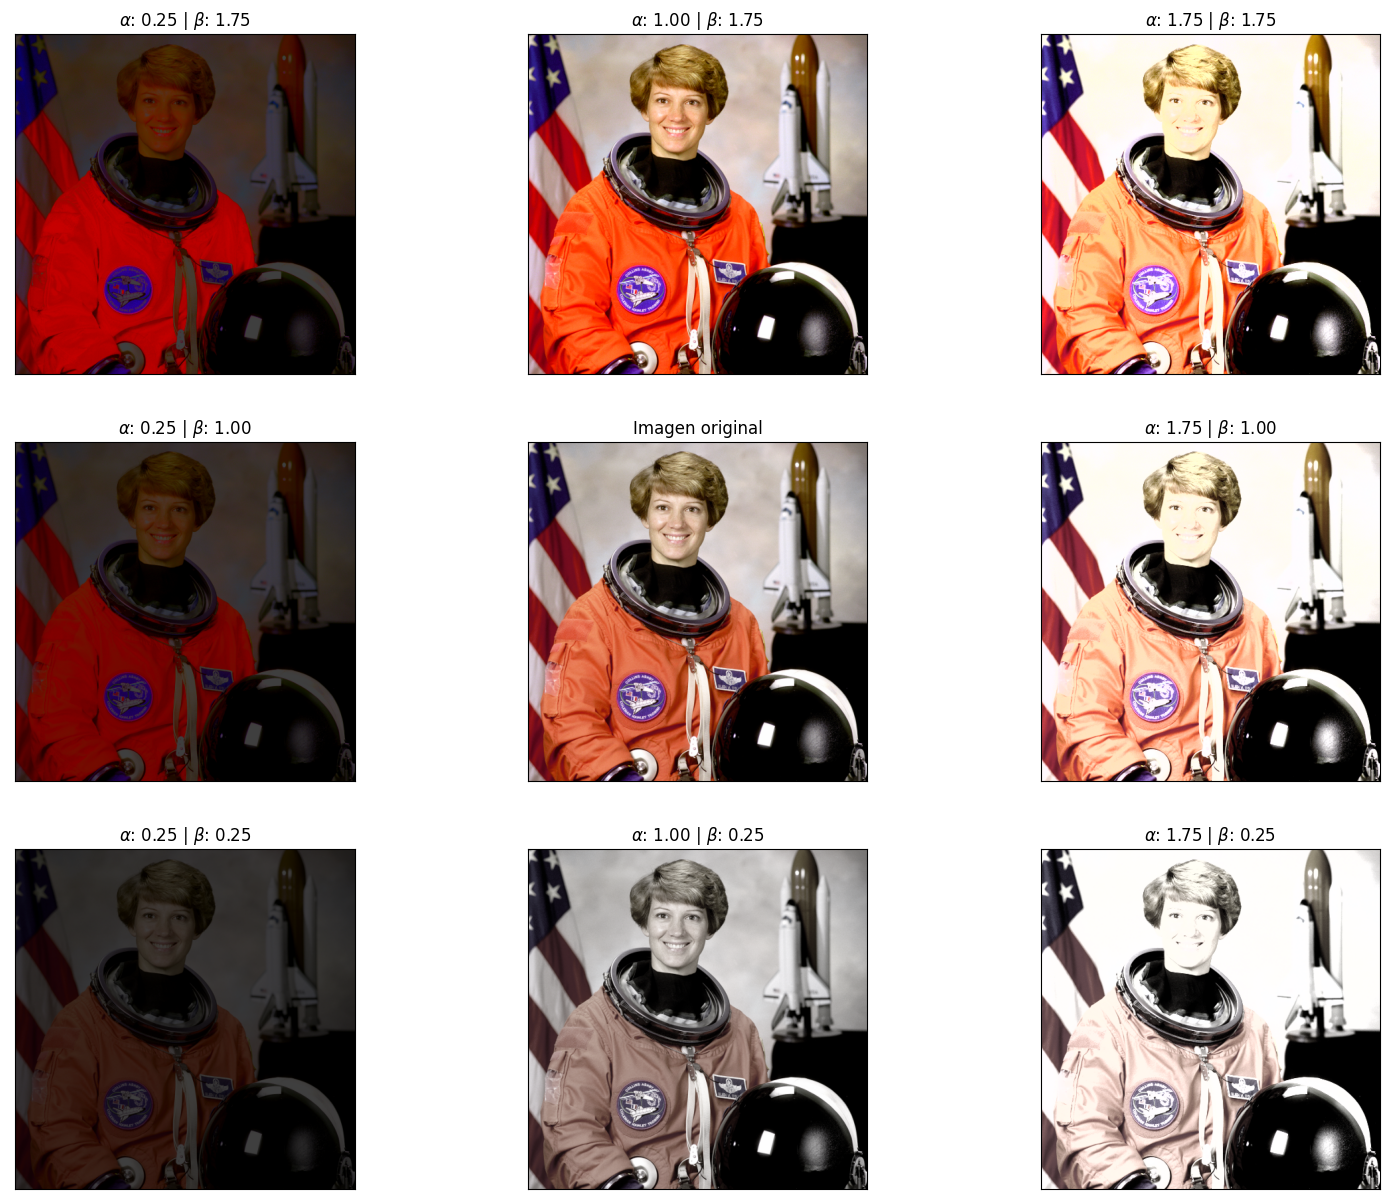

In [5]:
_, axs = plt.subplots(3, 3, figsize=(18.75, 15))

axs[0, 0].set_title(r'$\alpha$: 0.25 | $\beta$: 1.75')
axs[0, 0].imshow(change_lumcrom(astro, 0.25, 1.75))

axs[0, 1].set_title(r'$\alpha$: 1.00 | $\beta$: 1.75')
axs[0, 1].imshow(change_lumcrom(astro, 1.00, 1.75))

axs[0, 2].set_title(r'$\alpha$: 1.75 | $\beta$: 1.75')
axs[0, 2].imshow(change_lumcrom(astro, 1.75, 1.75))

axs[1, 0].set_title(r'$\alpha$: 0.25 | $\beta$: 1.00')
axs[1, 0].imshow(change_lumcrom(astro, 0.25, 1.00))

axs[1, 1].set_title('Imagen original')
axs[1, 1].imshow(astro)

axs[1, 2].set_title(r'$\alpha$: 1.75 | $\beta$: 1.00')
axs[1, 2].imshow(change_lumcrom(astro, 1.75, 1.00))

axs[2, 0].set_title(r'$\alpha$: 0.25 | $\beta$: 0.25')
axs[2, 0].imshow(change_lumcrom(astro, 0.25, 0.25))

axs[2, 1].set_title(r'$\alpha$: 1.00 | $\beta$: 0.25')
axs[2, 1].imshow(change_lumcrom(astro, 1.00, 0.25))

axs[2, 2].set_title(r'$\alpha$: 1.75 | $\beta$: 0.25')
axs[2, 2].imshow(change_lumcrom(astro, 1.75, 0.25))

for r in range(3):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

## Ejercicio 1.2
Desarrollar un apliastroivo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

### Funciones necesarias

In [6]:
def gamma_corr(img, gamma):
    '''
    Aplica una corrección gamma según sobre las luminancias de la imagen img, 
    i.e. permite manipular el histograma según una ley de potencias, donde 
    gamma toma valores reales positivos.
    '''

    nBin = np.linspace(0, 1, 50)

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según gamma
    img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] ** gamma, 0 , 1)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    return img_RGB

In [7]:
def partes_corr(img, m, M):
    '''
    Modifica el histogramas de luminancias de la imagen img mediante una 
    función lineal por partes.

    Dadas la mínima (m) y la máxima (M) luminancias deseadas:
        * Lleva a cero a toda luminancia menor a m.
        * Lleva a uno a toda luminancia mayor a M.
        * Mapea los valores intermedios según una función lineal.
    '''

    nBin = np.linspace(0, 1, 50)
    Delta = M - m

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según m y M
    img_YIQ[:,:,0][img_YIQ[:,:,0] < m] = 0
    img_YIQ[:,:,0][img_YIQ[:,:,0] > M] = 1
    img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] = (img_YIQ[:,:,0][(img_YIQ[:,:,0] >= m) & (img_YIQ[:,:,0] <= M)] - m) / Delta

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    return img_RGB

### Efectos sobre la foto de la astronauta

En la siguiente grilla se muestran diferentes funciones que afectan el histograma de luminancias. La imagen central de la primera fila es la original. En la columna izquierda se aplican correcciones con potencias, las cuales oscurecen aún más los píxeles oscuros y aclaran aún más los claros y, por este motivo, la quinta potencia termina generando una imagen mucho más oscura que la parábola. En la columna derecha hay correcciones con raíces, observándose el efecto opuesto: mapea un rango estrecho de valores bajos de luminancia hacia un rango mayor y viceversa. Por esta razón es que la raíz quinta genera una imagen con mucho más brillo que la raíz cuadrada. Por último, debajo de la imagen original se encuentra una modificación utilziando una función por partes que, en ete caso,  mapea el rango 0.3-0.9 al rango 0-1, llevando a 0 o a 1 todo lo que está por debajo o por encima de estos valores, respectivamente. No se observan grandes variaciones.

En todos los casos, vale la pena prestar atención al brillo sobre el casco, el cual acusa claramente los efectos de las diferentes modificaciones que se realizan sobre el histograma de luminancias de la imagen.

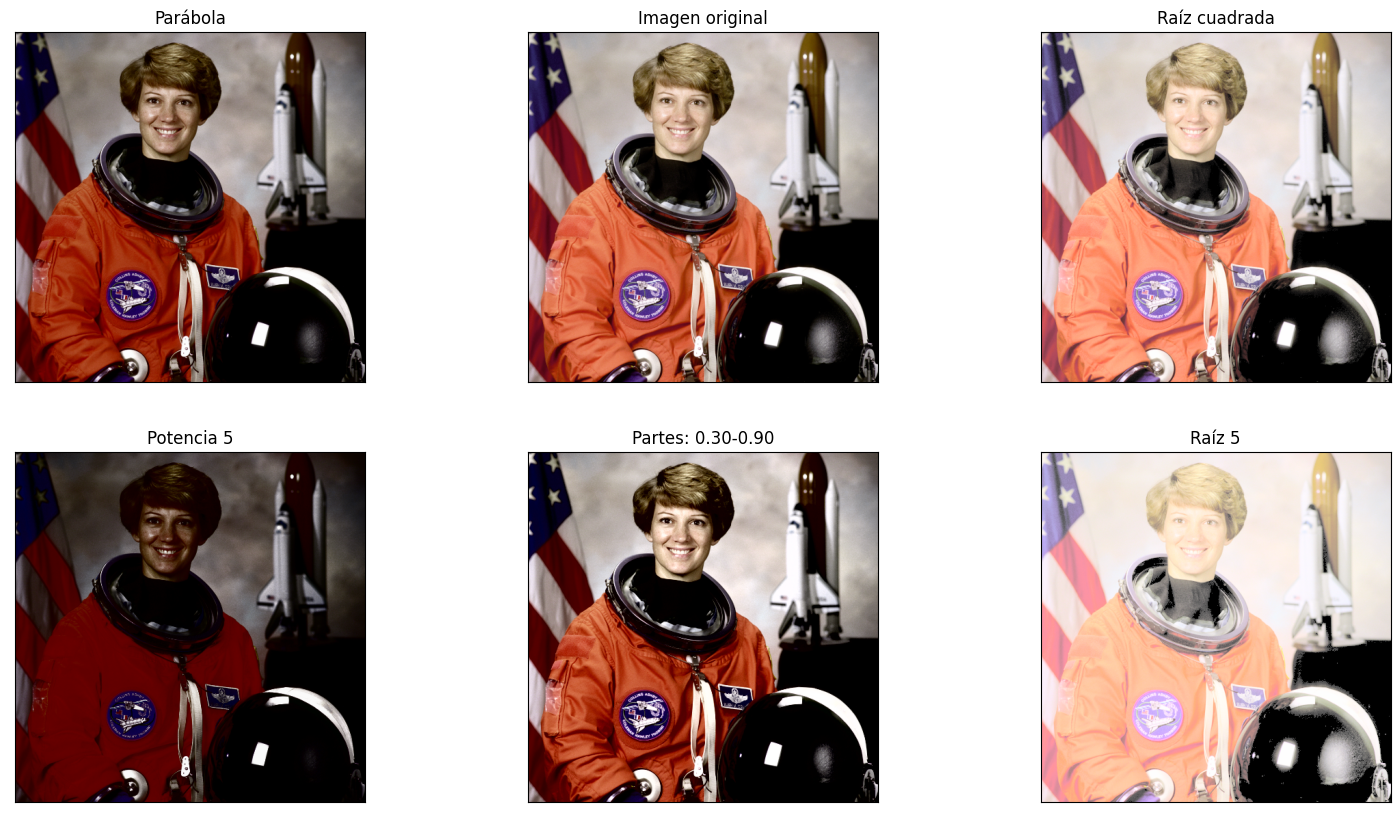

In [8]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Parábola')
axs[0, 0].imshow(gamma_corr(astro, 2))

axs[0, 1].set_title('Imagen original')
axs[0, 1].imshow(astro)

axs[0, 2].set_title('Raíz cuadrada')
axs[0, 2].imshow(gamma_corr(astro, 1/2))

axs[1, 0].set_title('Potencia 5')
axs[1, 0].imshow(gamma_corr(astro, 5))

axs[1, 1].set_title('Partes: 0.30-0.90')
axs[1, 1].imshow(partes_corr(astro, 0.30, 0.90))

axs[1, 2].set_title('Raíz 5')
axs[1, 2].imshow(gamma_corr(astro, 1/5))

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

---
# Ejercicio 2

## Negativo
Antes de comenzar, vamos a tomar el negativo a la imagen del caballo. Así, la imagen *original* será ahora este negativo. Hacemos esto para facilitar ciertas interpretaciones de los distintos filtrados que se harán, principalmente en la parte de procesamiento morfológico.

In [9]:
def negative(img):
    '''
    Genera el negativo fotográfico de img.
    '''

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Tomamos el negativo
    img_YIQ[:,:,0] = np.clip(1 - img_YIQ[:,:,0], 0 , 1)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Pasamos a 8-bit (enteros)
    img_RGB *= 255
    img_RGB = img_RGB.astype(int)

    return img_RGB

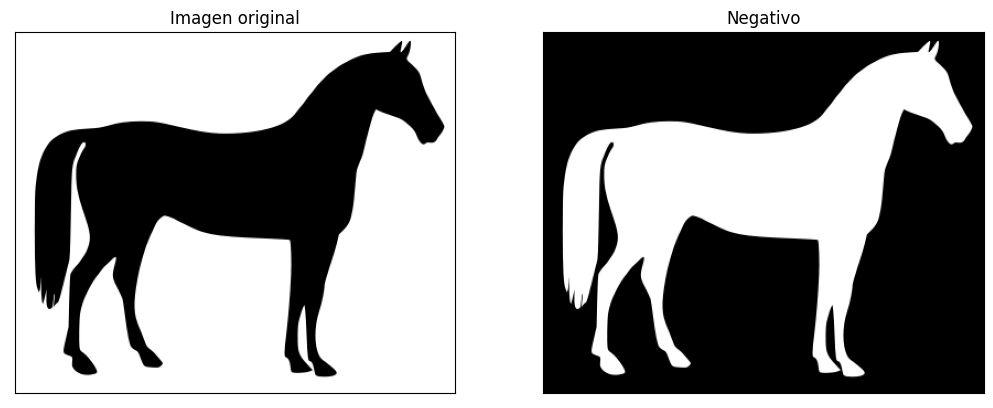

In [10]:
_, axs = plt.subplots(1, 2, figsize=(12.5, 5))

axs[0].set_title('Imagen original')
axs[0].imshow(horse)

horse = negative(horse)
axs[1].set_title('Negativo')
axs[1].imshow(horse)

for c in range(2):
    axs[c].set_xticks([])
    axs[c].set_yticks([])

plt.show()

## Ejercicio 2.1
Implementar un apliastroivo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

### Funciones de filtrado

In [11]:
def filter3(img, Kernel, Loop=1):
    '''
    Filtra la imagen img tomando la máscara Kernel de 3x3.
    El proceso se repite Loop veces.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    for l in range(Loop):
        # Generamos borde ficticio
        padd = chanY.copy()

        top = padd[0,:]
        bottom = padd[-1,:]
        padd = np.vstack([top, padd, bottom])

        left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
        right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
        padd = np.hstack([left, padd, right])

        # Aplicamos el filtro
        row, col = chanY.shape
        for r in range(row):
            for c in range(col):
                env = padd[r:r+3, c:c+3]
                chanY[r,c] = np.sum(env * Kernel)

        # Normalizamos el Kernel utilizado cuando usamos un pasabajos
        normKer = int(np.sum(Kernel))
        if normKer != 0:
            chanY *= 1/normKer

    return chanY

In [12]:
def filter5(img, Kernel, Loop=1):
    '''
    Filtra la imagen img tomando la máscara Kernel de 5x5.
    El proceso se repite Loop veces.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    for l in range(Loop):
        # Generamos borde ficticio
        padd = chanY.copy()

        top = padd[0,:]
        bottom = padd[-1,:]
        padd = np.vstack([top, top, padd, bottom, bottom])

        left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
        right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
        padd = np.hstack([left, left, padd, right, right])

        # Aplicamos el filtro
        row, col = chanY.shape
        for r in range(row):
            for c in range(col):
                env = padd[r:r+5, c:c+5]
                chanY[r,c] = np.sum(env * Kernel)

        # Normalizamos el Kernel utilizado cuando usamos un pasabajos
        normKer = int(np.sum(Kernel))
        if normKer != 0:
            chanY *= 1/normKer

    return chanY

### Máscaras

#### Pasabajos

In [13]:
# Filtro plano 3x3
Ker_plano = np.ones((3,3))

# Filtro de Bartlett 3x3
Ker_Bart = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]])

# Filtro Gaussiano 3x3
Pascal3 = np.array([1, 2, 1])
Ker_Gauss3 = np.outer(Pascal3, Pascal3)

# Filtro Gaussiano 5x5
Pascal5 = np.array([1, 4, 6, 4, 1])
Ker_Gauss5 = np.outer(Pascal5, Pascal5)

#### Pasaaltos

In [14]:
# Filtro Laplaciano vecino-4
Ker_Lap4 = np.array([[0, -1, 0], 
                     [-1, 4, -1],
                     [0, -1, 0]])

# Filtros de Sobel
Ker_SN = np.array([[1, 2, 1], 
                   [0, 0, 0], 
                   [-1, -2, -1]])

Ker_OE = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]])

Ker_SONE = np.array([[0, 1, 2], 
                     [-1, 0, 1], 
                     [-2, -1, 0]])

Ker_NOSE = np.array([[-2, -1, 0], 
                     [-1, 0, 1], 
                     [0, 1, 2]])

### Efectos sobre la foto del caballo

#### Pasabajos

Al aplicar un filtro pasabajos sobre una imagen, se reemplaza el valor de cada píxel de la imagen original por el promedio de los píxeles contenidos en el entorno definido por el Kernel. La imagen resultante tiene una reducción en la nitidez de las transiciones en intensidades, *i.e.* se difumina, perdiéndose los bordes y reduciendo el nivel de detalle. Por este motivo es que también se los reconoce como filtros de suavizado. Esto se debe a que el filtro pasabajos deja pasar frecuencias bajas (zonas donde la derivada del perfil de luminancia es pequeña), eliminando las frecuencias altas (zonas donde dicha derviada es alta).

En la siguiente grilla vemos la aplicación de este tipo de filtros, donde fueron aplicados dos veces consecutivas cada uno de ellos. El filtro plano resulta ser el promedio aritmético de los píxeles considerados por el Kernel, i.e. ninguno de los píxeles resulta más relevante que otro. Por otra parte, los filtros Gaussianos son un promedio ponderado donde el punto central del Kernel es máximo y los otros valores se van reduciendo en función de la distancia al centro, siguiendo una distribución Gaussiana. En todos los casos queda en evidencia lo antes dicho: al aplicar estos filtros, la imagen se difumina y pierde detalle. Tanto el filtro plano como el Gaussiano 3x3 tienen un grado de difuminado similar, mientras que esto es más pronunciado cuando usamos el Gaussiano 5x5.

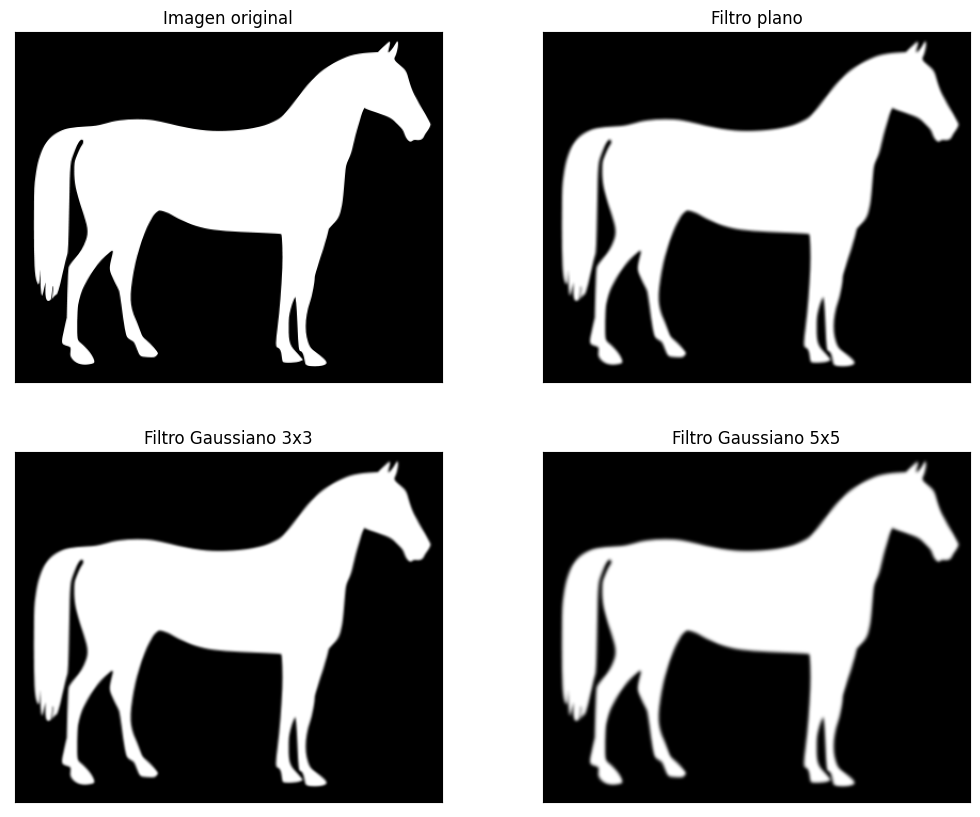

In [15]:
_, axs = plt.subplots(2, 2, figsize=(12.5, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(horse,"gray")

axs[0, 1].set_title('Filtro plano')
axs[0, 1].imshow(filter3(horse, Ker_plano, 2),"gray")

axs[1, 0].set_title('Filtro Gaussiano 3x3')
axs[1, 0].imshow(filter3(horse, Ker_Gauss3, 2),"gray")

axs[1, 1].set_title('Filtro Gaussiano 5x5')
axs[1, 1].imshow(filter5(horse, Ker_Gauss5, 2),"gray")

for r in range(2):
    for c in range(2):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Pasaaltos

El principal objetivo de los filtros pasaaltos es amplificar transiciones de intensidad, como los bordes de los objetos u otras discontinuidades, difuminando aquellas zonas donde la variación es baja: deja pasar frecuencias altas, eliminando las bajas. Por este motivo se los llama también filtros de realce.

En la siguiente grilla vemos la aplicación de este tipo de filtros, donde fueron aplicados una única vez cada uno de ellos. El resultado en términos generales es que se resalta la silueta del caballo. El filtro Laplaciano vecino-4 es un filtro isotrópico bajo rotaciones de 90°, *i.e.* rotar 90° la imagen y luego aplicar el filtro da el mismo resultado que aplicar el filtro a la imagen primero y luego rotar el resultado 90°. Por esto es que la silueta del caballo se ve igualmente resaltada en todas direcciones, sin que haya alguna preferencia. Por otra parte, tenemos los filtros direccionales, los cuales son anisotrópicos, teniendo una dirección preferencial del espacio. Esto se logra al tener una distribución particular de coeficientes en el Kernel, los cuales permiten destacar las transiciones locales que se dan en un cierto sentido dentro de la imagen. En este caso se usaron 4 tipos de Kernels de Sobel: Sur-Norte, Oeste-Este, Noroeste-Sureste y Suroeste-Noreste. Vemos ahora que la silueta del caballo no está resaltada de manera equitativa, sino que hay una zona más oscura y otra más clara. Por ejemplo, en el caso Sur-Norte, la parte de abajo del caballo sale clara debido a la transición negro-blanco, mientras que la parte de arriba sale oscura por la transición blanco-negro.

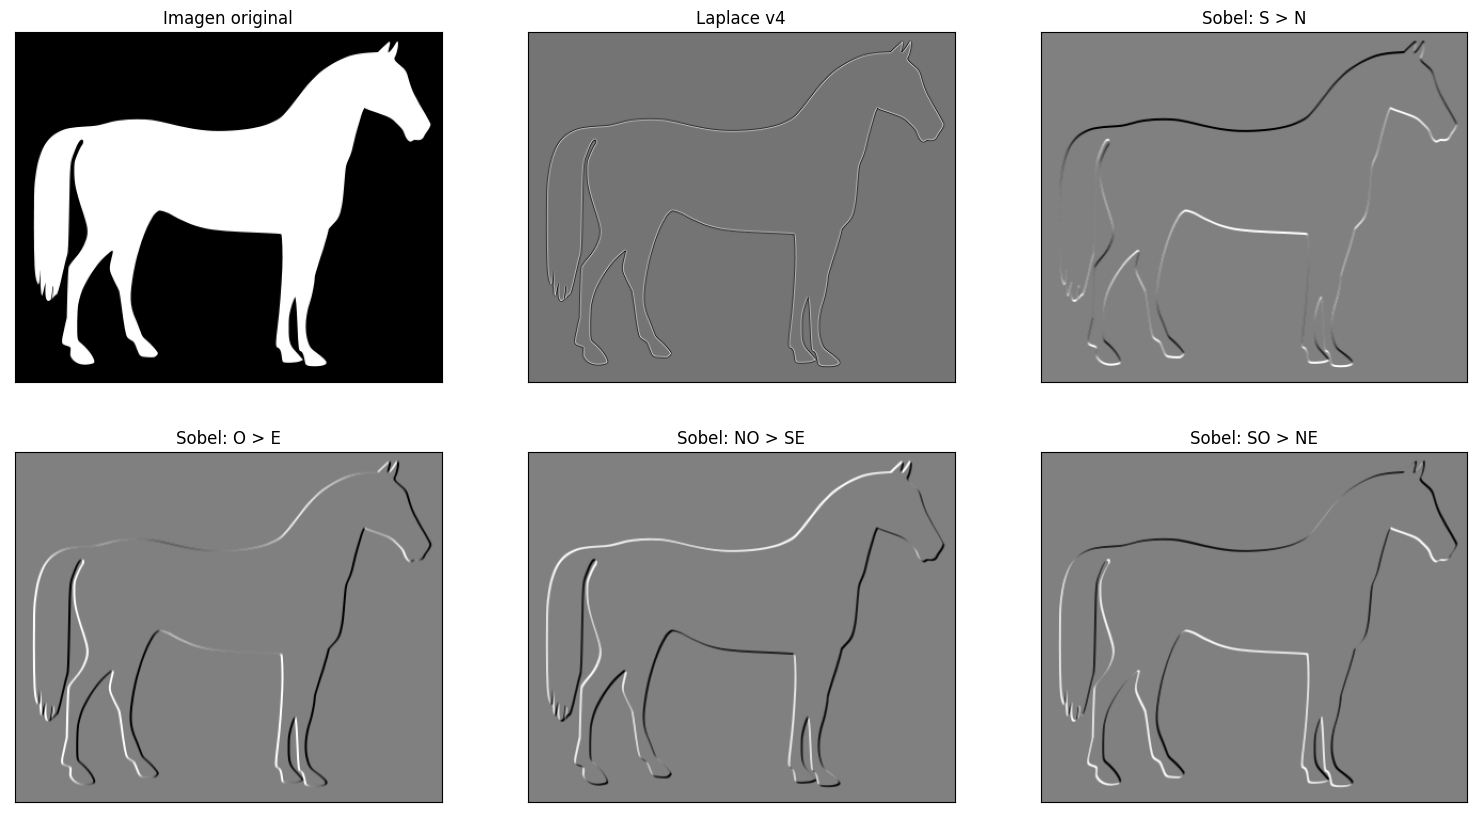

In [16]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(horse)

axs[0, 1].set_title('Laplace v4')
axs[0, 1].imshow(filter3(horse, Ker_Lap4),"gray")

axs[0, 2].set_title('Sobel: S > N')
axs[0, 2].imshow(filter3(horse, Ker_SN),"gray")

axs[1, 0].set_title('Sobel: O > E')
axs[1, 0].imshow(filter3(horse, Ker_OE),"gray")

axs[1, 1].set_title('Sobel: NO > SE')
axs[1, 1].imshow(filter3(horse, Ker_NOSE),"gray")

axs[1, 2].set_title('Sobel: SO > NE')
axs[1, 2].imshow(filter3(horse, Ker_SONE),"gray")

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Pasabanda: DoG

Los filtros pasabanda retienen las frecuencias dentro de cierto rango (banda) de frecuencias de interés, atenuando frecuencias bajas y altas. Éstos aprovechan la linealidad de la convolución y, en el caso de DoG, se tiene un filtro pasabanda como la diferencia entre dos pasabajos, permitiendo conservar estrucutars cuya frecuencia es intermedia.

En la siguiente figura se pueden comparar la imagen original y la aplicación del filtro DoG. Si bien logramos resaltar los mismo, vemos que el orden en que se aplican los pasabajos da diferentes resultados: en el primero caso el borde interior del caballo es blanco, mientras que el exterior es negro y lo opuesto ocurre en el segundo caso.

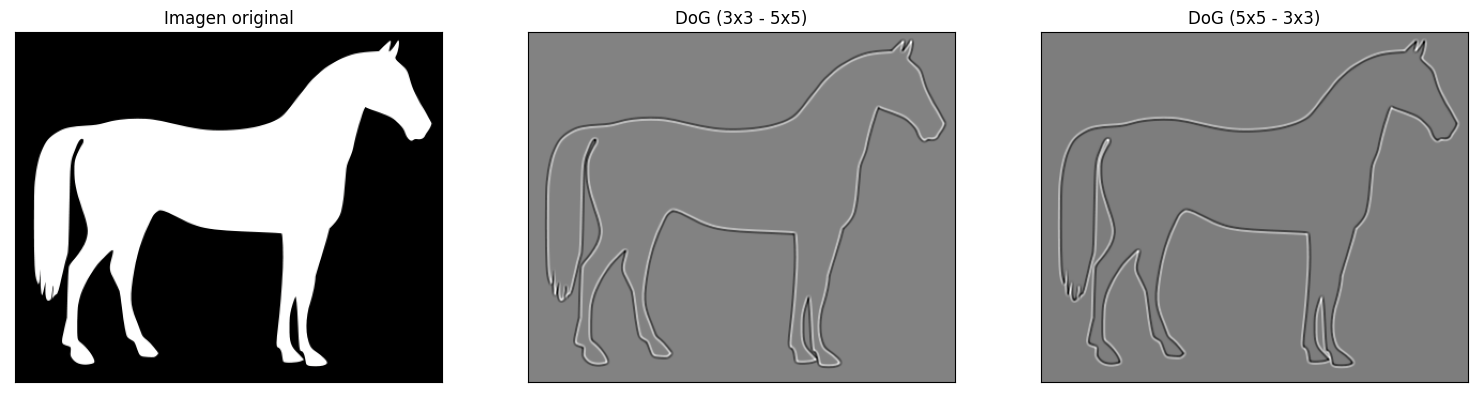

In [17]:
_, axs = plt.subplots(1, 3, figsize=(18.75, 5))

axs[0].set_title('Imagen original')
axs[0].imshow(horse)

axs[1].set_title('DoG (3x3 - 5x5)')
axs[1].imshow(filter3(horse, Ker_Gauss3) - filter5(horse, Ker_Gauss5),"gray")

axs[2].set_title('DoG (5x5 - 3x3)')
axs[2].imshow(filter5(horse, Ker_Gauss5) - filter3(horse, Ker_Gauss3),"gray")

for c in range(3):
    axs[c].set_xticks([])
    axs[c].set_yticks([])

plt.show()

## Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

### Funciones morfológicas

In [18]:
def erosion(img, Loop=1):
    '''
    Erosiona la imagen img.
    El proceso se repite Loop veces.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    for l in range(Loop):
        # Generamos borde ficticio
        padd = chanY.copy()

        top = padd[0,:]
        bottom = padd[-1,:]
        padd = np.vstack([top, padd, bottom])

        left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
        right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
        padd = np.hstack([left, padd, right])

        # Aplicamos el filtro
        row, col = chanY.shape
        for r in range(row):
            for c in range(col):
                env = padd[r:r+3, c:c+3]
                chanY[r,c] = np.min(env)

    return chanY

In [19]:
def dilatacion(img, Loop=1):
    '''
    Dilata la imagen img.
    El proceso se repite Loop veces.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    for l in range(Loop):
        # Generamos borde ficticio
        padd = chanY.copy()

        top = padd[0,:]
        bottom = padd[-1,:]
        padd = np.vstack([top, padd, bottom])

        left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
        right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
        padd = np.hstack([left, padd, right])

        # Aplicamos el filtro
        row, col = chanY.shape
        for r in range(row):
            for c in range(col):
                env = padd[r:r+3, c:c+3]
                chanY[r,c] = np.max(env)

    return chanY

In [20]:
def fil_mediana(img):
    '''
    Aplica un filtro de mediana sobre la imagen img.
    '''

    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    # Generamos borde ficticio
    padd = chanY.copy()

    top = padd[0,:]
    bottom = padd[-1,:]
    padd = np.vstack([top, padd, bottom])

    left = np.reshape(padd[:,0], (len(padd[:,0]), 1))
    right = np.reshape(padd[:,-1], (len(padd[:,-1]), 1))
    padd = np.hstack([left, padd, right])

    # Aplicamos el filtro
    row, col = chanY.shape
    for r in range(row):
        for c in range(col):
            env = padd[r:r+3, c:c+3]
            chanY[r,c] = np.median(env)

    return chanY

In [21]:
def borde_ext(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return dilatacion(img) - chanY

def borde_int(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return chanY - erosion(img)

In [22]:
def apertura(img, Loop=1):
    ap = img.copy()
    for l in range(Loop):
        ap = dilatacion(erosion(ap))
    return ap

def cierre(img, Loop=1):
    ap = img.copy()
    for l in range(Loop):
        ap = erosion(dilatacion(ap))
    return ap

In [23]:
def top_hat(img):
    # Tenemos la imagen RGB completa
    if img.ndim == 3:
        # Normalizamos los valores de RGB
        img_norm  = img / 255

        # Nos vamos a YIQ
        img_YIQ = rot_base(img_norm, RGB2YIQ)
        chanY = img_YIQ[:,:,0]

    # Partimos de una imagen monocanal (Y)
    else:
        chanY = img

    return chanY - apertura(img)

### Efectos sobre la foto del caballo

#### Erosión, dilatación, filtro de mediana y borde morfológico

En la siguiente grilla comparamos los efectos de las dos operaciones básicas del procesamiento morfológico binario (erosión y dilatación), junto al filtro de mediana y al borde morfológico (tanto interno como externo). Las dos primeras se aplican 3 veces consecutivas sobre la imagen original. En el caso de la dilatación, nos quedamos con el máximo valor encontrado sobre la imagen al aplicarle el elemento estructurante (que en este caso siempre fue 3x3), mientras que en la erosión retenemos el mínimo. En una imagen binaria, máximo significa blanco y mínimo es negro. Por eso es que la dilatación provoca que el caballo crece en tamaño, mientras que en la erosión vaya desapareciendo. Al tratarse de operaciones no lineales, la imagen se irá alterando cada vez más cuanto más veces se aplique alguna de estas operaciones, no teniendo que ser necesariamente la misma.

En el caso del filtro de mediana, retenemos la mediana dentro de los píxeles sobre los cuales se posa el elemento estructurante. Por este motivo es que aplicaciones sucesivas de este filtro no generan nuevas variaciones sobre la imagen del caballo. Sólo se aprecian cambios en el contorno del caballo.

Finalmente, en el caso del borde morfológico, vemos que retenemos la silueta del cabllo, similar a lo que ocurría con los filtros pasaaltos. Sin embargo, esto no es exactamente igual, ya que antes se aplicaron operaciones lineales y ahora intervienen operaciones morfológicas (no lineales). En el caso del borde exterior debemos restarle la imagen original a la imagen ya dilatada, *i.e.* primero dilatamos la silueta del caballo y a eso le restamos la silueta original. Para el caso del borde interior debemos restarle a la imagen original su erosión, *i.e.* le restamos a la silueta original del caballo su silueta erosionada. Para la imagen en estudio, la diferencia entre el borde exterior e interior es muy sutil, pero puede apreciarse en las orejas del caballo y en la punta de su cola: se observan más gruesas o más finas según sea borde exterior o interior, respectivamente.

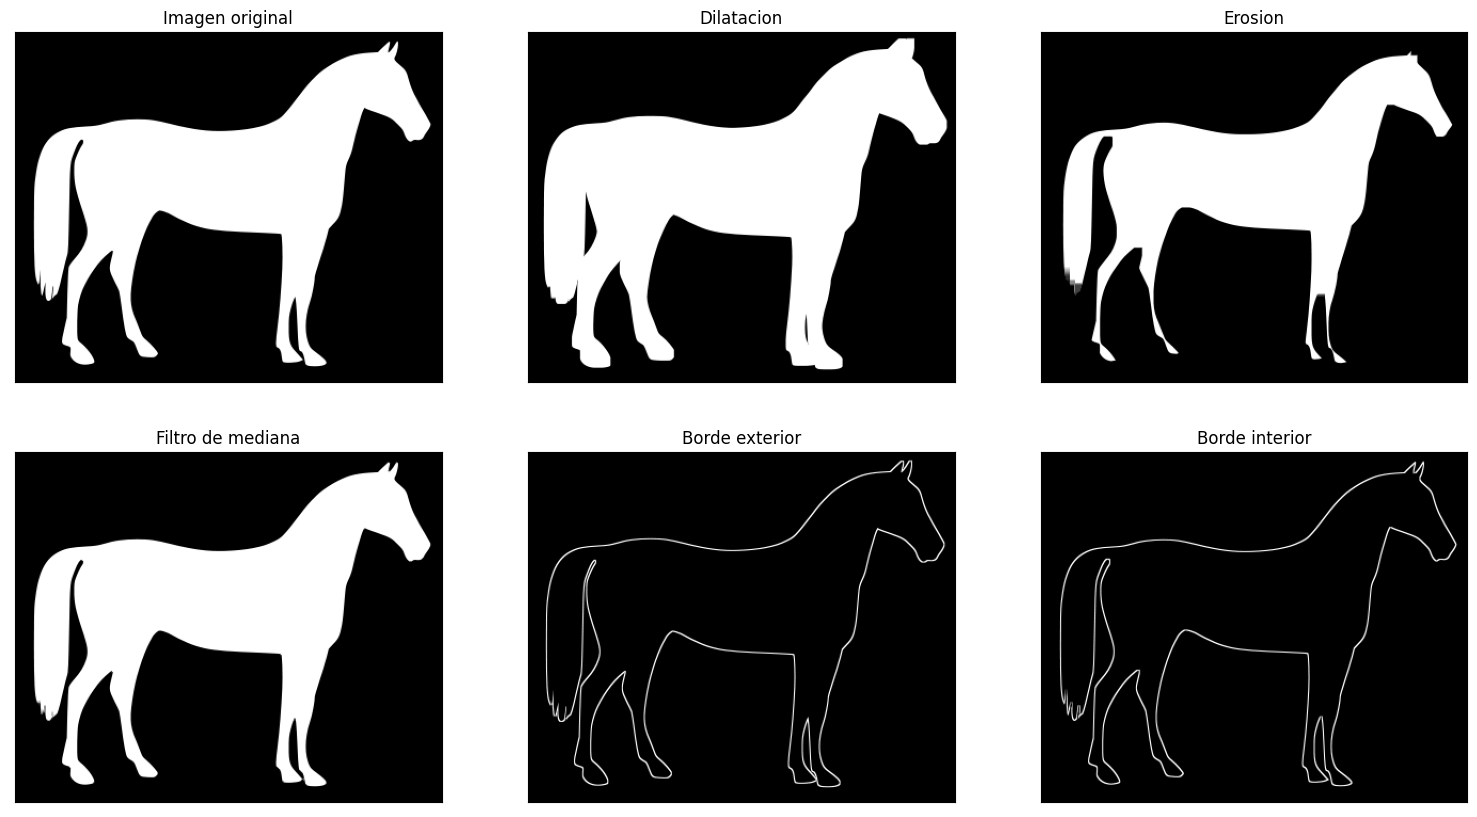

In [24]:
_, axs = plt.subplots(2, 3, figsize=(18.75, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(horse)

axs[0, 1].set_title('Dilatacion')
axs[0, 1].imshow(dilatacion(horse, 3),"gray")

axs[0, 2].set_title('Erosion')
axs[0, 2].imshow(erosion(horse, 3),"gray")

axs[1, 0].set_title('Filtro de mediana')
axs[1, 0].imshow(fil_mediana(horse),"gray")

axs[1, 1].set_title('Borde exterior')
axs[1, 1].imshow(borde_ext(horse),"gray")

axs[1, 2].set_title('Borde interior')
axs[1, 2].imshow(borde_int(horse),"gray")

for r in range(2):
    for c in range(3):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()

#### Apertura, cierre y top-hat

La apertura morfológica primero erosiona la imagen y, luego, dilata la imagen erosionada. Esto permite eliminar objetos pequeños y líneas finas de la imagen, conservando la forma y el tamaño de los objetos más grandes. Por otra parte, el cierre morfológico primero dilata la imagen y, luego, erosiona la imagen dilatada, permitiendo rellenar huecos pequeños en la imagen, conservando la forma y el tamaño de los objetos más grandes.

La imagen resultante de aplicar la apertura no se logra apreciar tan bien, pero se notan cambios en las orejas, las pesuñas y la punta de la cola del caballo, perdiendo definición en las puntas de dichas partes. En el caso del cierre, es más notorio su efecto sobre estas mismas partes del caballo, donde se engrosan y desaparecen partes que antes eran negras.

Finalmente, se aplica la operación morfológica top-hat, la cual le resta a la imagen original su apertura, *i.e.* le resta la dilatación de la erosión. Suele utilizarse para mejorar el contraste de una imagen en niveles de gris cuya iluminación no es uniforme o tmabién puede aislar objetos claros pequeños en una imagen. Vemos que el resultado de aplicar esta operación sobre la imagen del caballo genera una imagen donde se aprecian las puntas de la cola, las pesuñas y las orejas, que es justametne lo que desapareció en la imagen de apertura.

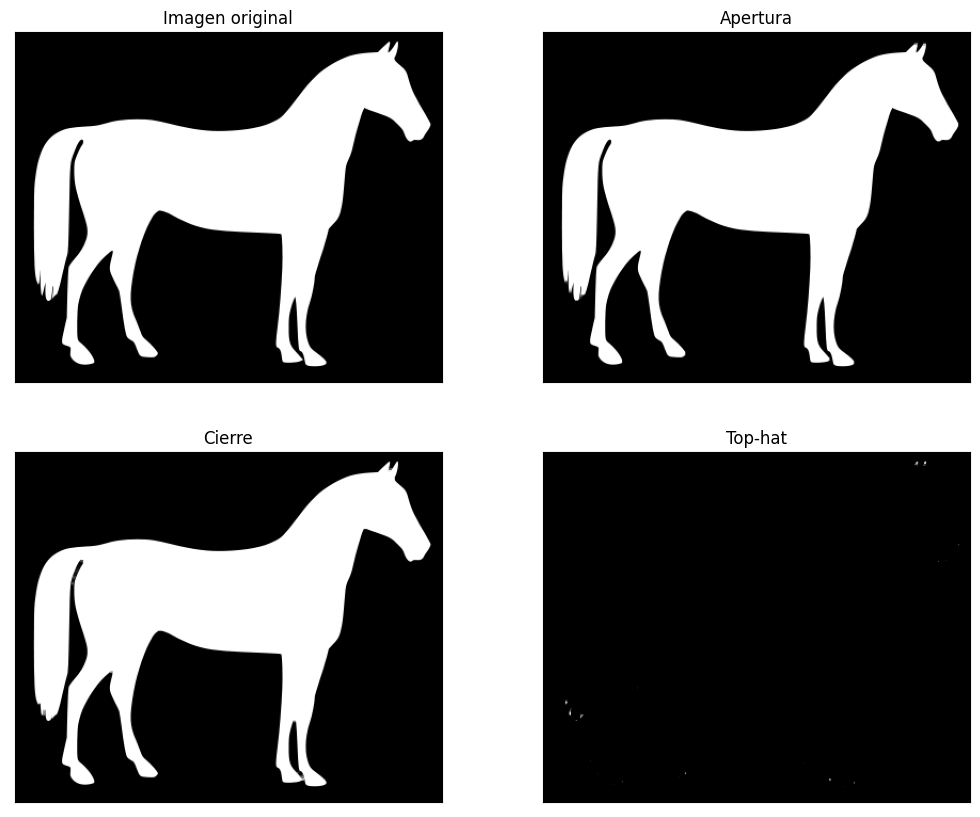

In [25]:
_, axs = plt.subplots(2, 2, figsize=(12.5, 10))

axs[0, 0].set_title('Imagen original')
axs[0, 0].imshow(horse)

axs[0, 1].set_title('Apertura')
axs[0, 1].imshow(apertura(horse),"gray")

axs[1, 0].set_title('Cierre')
axs[1, 0].imshow(cierre(horse),"gray")

axs[1, 1].set_title('Top-hat')
axs[1, 1].imshow(top_hat(horse),"gray")

for r in range(2):
    for c in range(2):
        axs[r, c].set_xticks([])
        axs[r, c].set_yticks([])

plt.show()